# FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
data = pd.read_csv('foodhub_order.csv')
df = data.copy()

In [3]:
df['total_time']=df['food_preparation_time']+df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,49


#### Observations:

The DataFrame has 9 columns, plus 1 added, as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? 

In [4]:
df.shape

(1898, 10)

#### Observations:
There are 1898 rows, each one with a unique order_id, and 10 columns (due to a 10th column being added).

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   total_time             1898 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 148.4+ KB


#### Observations:
The datatypes are integers, object strings, and floats. All columns have 1898 non-null datapoints.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

In [6]:
print(df.isnull().sum())
df['rating']=df['rating'].replace(['Not given'],np.nan)
df['rating']=df['rating'].astype(float)
print()
print('After replacing with Null Values:')
print('_________________________________')
print(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
total_time               0
dtype: int64

After replacing with Null Values:
_________________________________
order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
total_time                 0
dtype: int64


#### Observations:
Initially, there are no null values. However, the "rating" column has values that are "Not given." These values will be turned into NaN values, and as such, there are now 736 null values in the dataset. Also, the "rating" column will now be typed as floats instead of strings.  

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [37]:
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
count,1898.000,1898.000,1898,1898,1898.000,1898,1162.000,1898.000,1898.000,1898.000
unique,NaN,NaN,178,14,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,NaN,NaN,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,NaN,NaN,NaN,NaN
mean,1477495.500,171168.478,NaN,NaN,16.499,NaN,4.344,27.372,24.162,51.534
std,548.050,113698.140,NaN,NaN,7.484,NaN,0.741,4.632,4.973,6.834
min,1476547.000,1311.000,NaN,NaN,4.470,NaN,3.000,20.000,15.000,35.000
25%,1477021.250,77787.750,NaN,NaN,12.080,NaN,4.000,23.000,20.000,47.000
50%,1477495.500,128600.000,NaN,NaN,14.140,NaN,5.000,27.000,25.000,52.000
75%,1477969.750,270525.000,NaN,NaN,22.297,NaN,5.000,31.000,28.000,56.000


#### Observations:
Food preparation time:
    Min - 20 minutes,
    Mean - 27. 37 minutes,
    Max - 35 minutes

### **Question 5:** How many orders are not rated?

In [41]:
df['rating'].isnull().sum()

736

#### Observations:
There are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

In [9]:
print(df['order_id'].count())
print(round(df.groupby('customer_id')['order_id'].count().mean(),2))
print(df.groupby('customer_id')['order_id'].count().max())

1898
1.58
13


178
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


<Axes: xlabel='restaurant_name'>

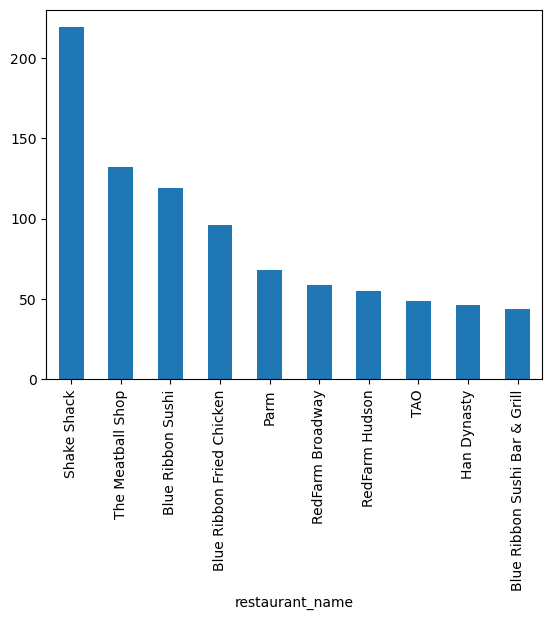

In [47]:
print(df['restaurant_name'].nunique())
print(df['restaurant_name'].value_counts().head())
df['restaurant_name'].value_counts().nlargest(10).plot(kind='bar')

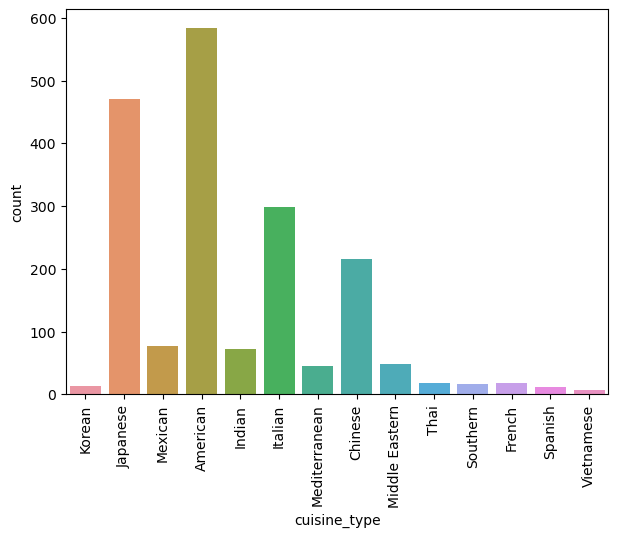

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


In [11]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()
print(df['cuisine_type'].value_counts())

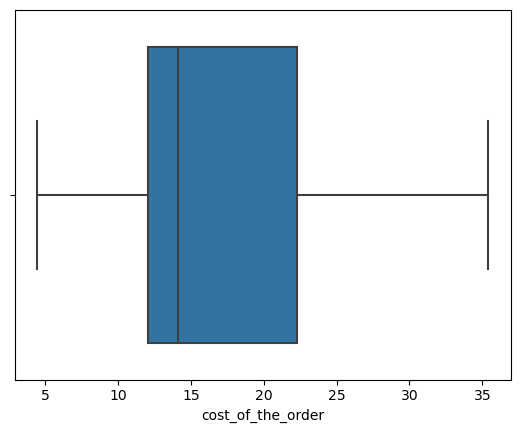

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

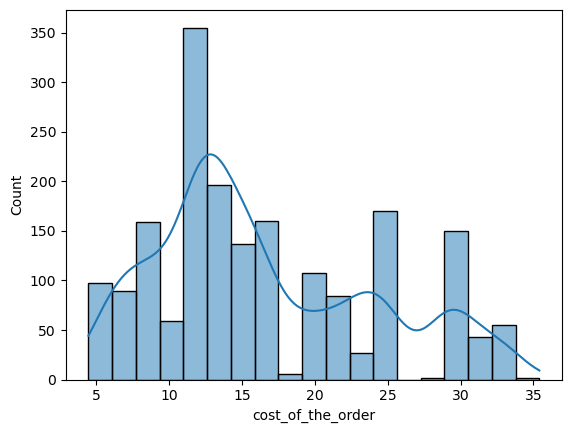

In [12]:
sns.boxplot(data=df,x='cost_of_the_order');
plt.show()
sns.histplot(data=df,x='cost_of_the_order',kde=True)

day_of_the_week
Weekend   0.712
Weekday   0.288
Name: proportion, dtype: float64

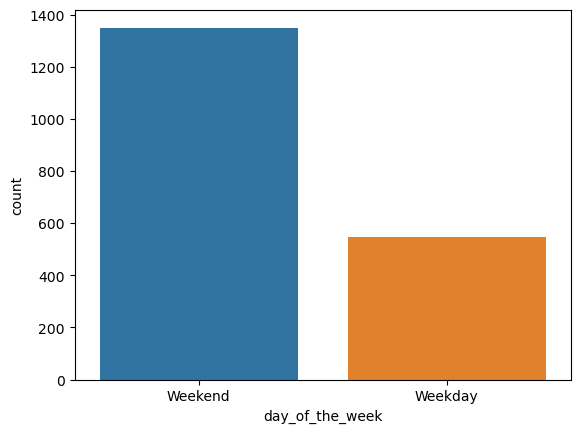

In [13]:
sns.countplot(data=df,x='day_of_the_week')
df['day_of_the_week'].value_counts(normalize=True)

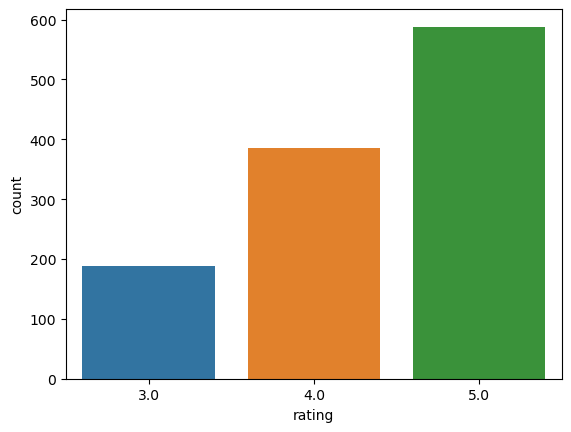

rating
NaN     0.388
5.000   0.310
4.000   0.203
3.000   0.099
Name: proportion, dtype: float64
rating
5.000   0.506
4.000   0.332
3.000   0.162
Name: proportion, dtype: float64


In [14]:
sns.countplot(data=df,x='rating')
plt.show()
print(df['rating'].value_counts(normalize=True,dropna=False))
print(df['rating'].value_counts(normalize=True))

Axes(0.125,0.11;0.775x0.77)


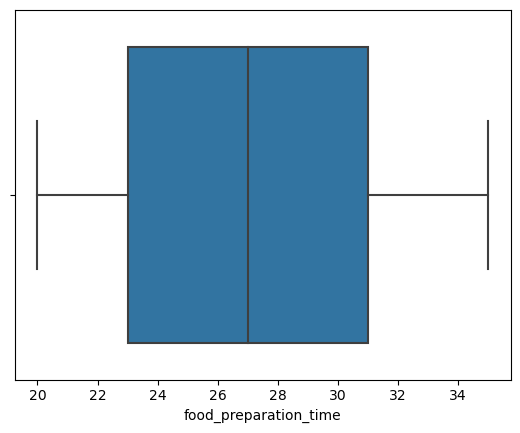

Axes(0.125,0.11;0.775x0.77)


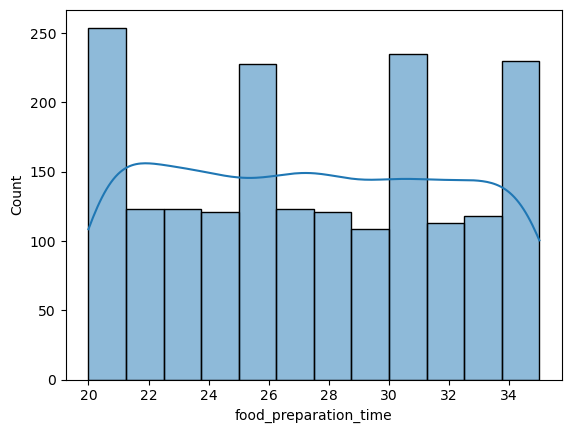

In [15]:
print(sns.boxplot(data=df,x='food_preparation_time'));
plt.show()
print(sns.histplot(data=df,x='food_preparation_time',kde=True));

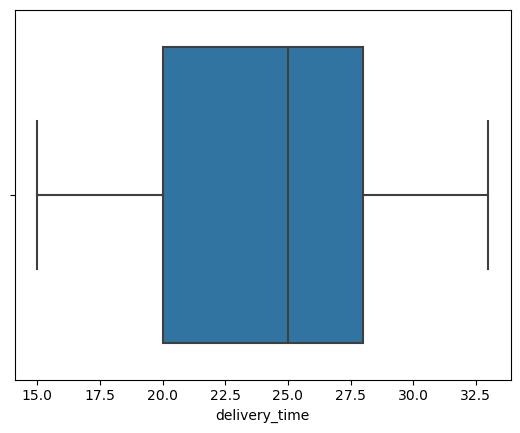

<Axes: xlabel='delivery_time', ylabel='Count'>

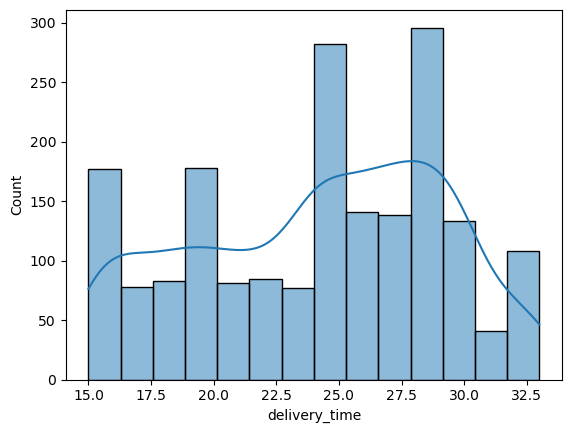

In [16]:
sns.boxplot(data=df, x='delivery_time')
plt.show()
sns.histplot(data=df, x='delivery_time',kde=True)

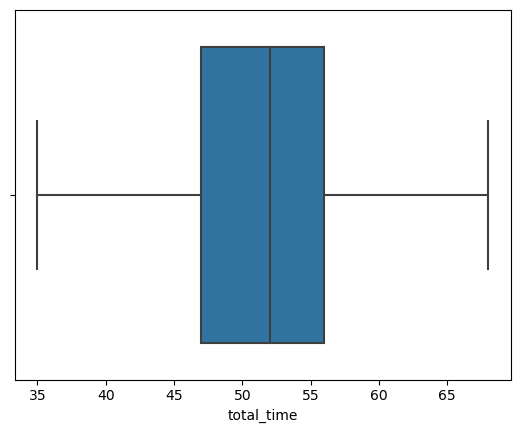

<Axes: xlabel='total_time', ylabel='Count'>

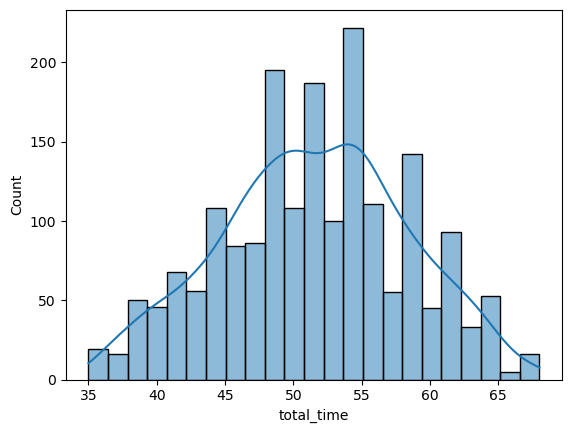

In [17]:
sns.boxplot(data=df, x='total_time')
plt.show()
sns.histplot(data=df, x='total_time',kde=True)

#### Oberservations
There were at total of 1898 total orders. There were 178 unique restaurants that were ordered from. Shake Shack had the highest amount of orders with 219. The average number of orders for each customer was 1.58 with the maximum being 13 orders. The most popular cuisine type, in terms of number of orders, was American, followed by Japanese. The least popular cuisine types were Vietnamese and Spanish. The cost of orders is right-skewed with the majority of them costing between 10 to 15 dollars, and the median being around 14 dollars. The most popular days of the week to order food were Saturday and Sunday as around 70% of the orders were made on the weekend. For the ratings, around 39% of the orders were not given a rating, and around 31% were given a 5. However, if non-rated orders are excluded, the most popular rating on the app was 5, as it had around a 51% occurence, and there was an average rating of 4.3 across all orders. The food preparation time shows a multi-modal distribution with multipe timings having a high count throughout the data. Both the median and the mean are around 27 minutes of preparation time. The delivery time is slightly left-skewed with another multi-modal distribution. The majority of the orders took 24 to 30 minutes to be delivered. The median is around 25 minutes and the average is around 24 minutes. There are no outliers in any of the graphs.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [18]:
print(df['restaurant_name'].value_counts().head(5))

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
The top 5 restaurants in terms of orders received were Shake Shack (219), The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Fried Chicken (96), and Parm (68).

### **Question 8**: Which is the most popular cuisine on weekends?

In [19]:
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:
The most popular cuisine on the weekends was American with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? 

In [48]:
percent_order_cost=(df[df['cost_of_the_order']>20].shape[0])/(df.shape[0])*100
print(round(percent_order_cost,2),'%')
(df['cost_of_the_order']>20).mean()

29.24 %


0.2924130663856691

#### Observations:
29.24% of the orders cost more than 20 dollars. This also means that 70% of the orders cost below $20.

### **Question 10**: What is the mean order delivery time?

In [21]:
round(df['delivery_time'].mean(),2)

24.16

#### Observations:
The average delivery time was 24.16 minutes 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. 

In [22]:
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
The top 3 customers with the most orders placed were 52832 with 13 orders, 47440 with 10 orders, and 83287 with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) 


#### Correlation

<Axes: >

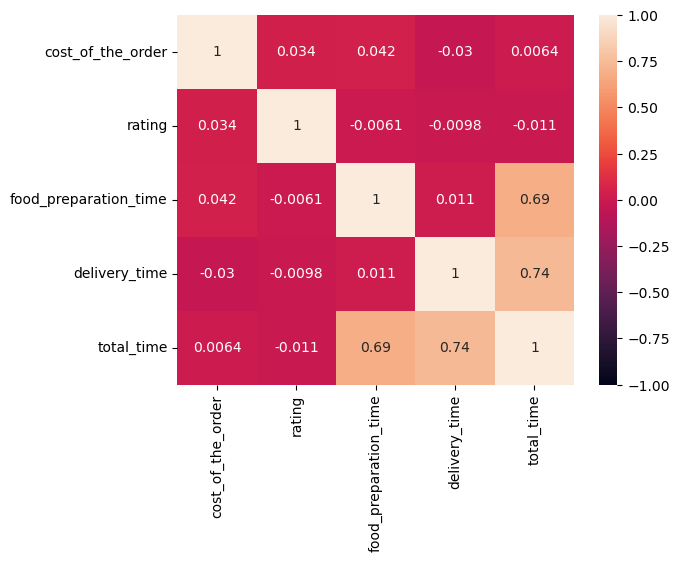

In [23]:
sns.heatmap(data=df[['cost_of_the_order','rating','food_preparation_time','delivery_time','total_time']].corr(),annot=True,vmin=-1, vmax=1)

According to the heatmap, there is little correlation between the numerical variables, except for the time variables. This makes sense, as if either delivery time or preparation time increases, then total time increases. What is interesting is that preparation and delivery time are positlvey correlated, meaning that a higher preparation time may be an indicator of a higher delivery time. 

#### Rating vs Cost

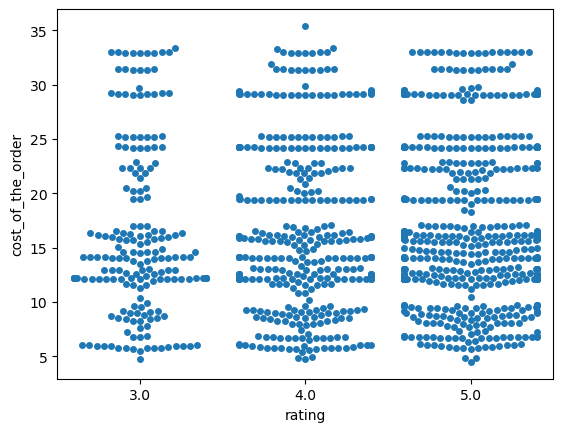

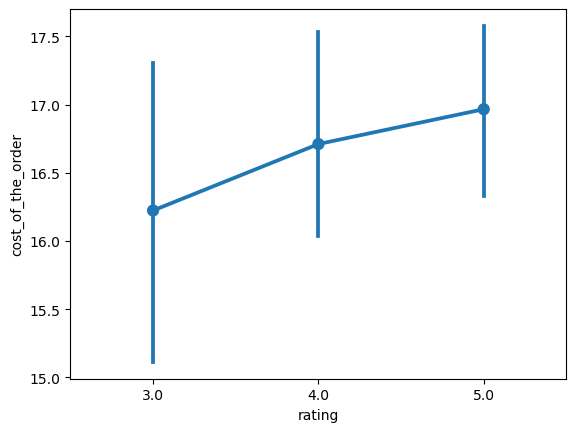

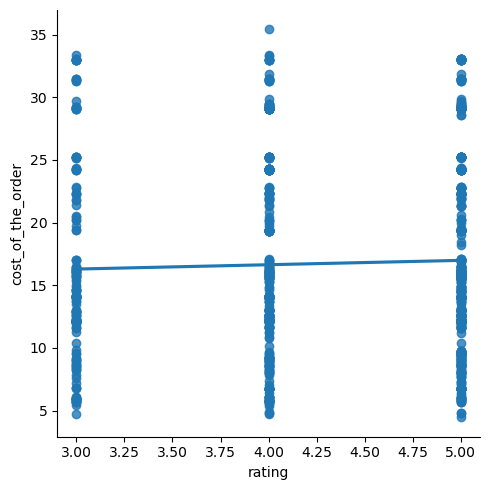

In [24]:
sns.swarmplot(data=df[df['rating'].notnull()],x='rating',y='cost_of_the_order')
plt.show()
sns.pointplot(data=df,x='rating',y='cost_of_the_order')
plt.show()
sns.lmplot(data=df,x='rating',y='cost_of_the_order',ci=False)

For rating, it seems that a higher rating is slightly correlated with a higher cost, according to the pointplot. Most of the ratings are for orders below $20, and of those, it seems most of them got a 5 rating.The linear model plot also shows a very slight positive correlation. 

#### Rating vs Time

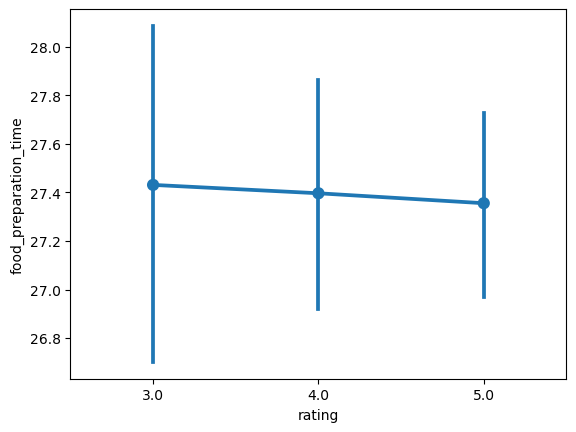

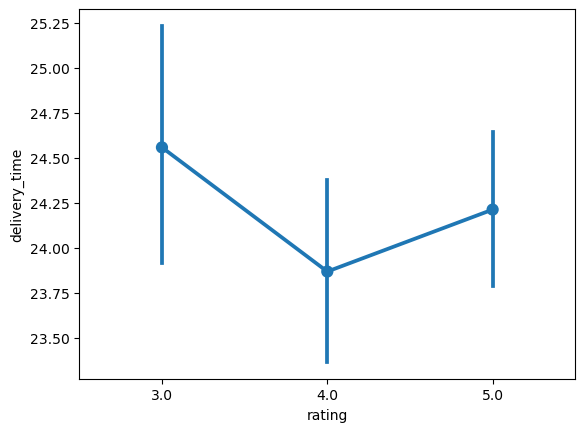

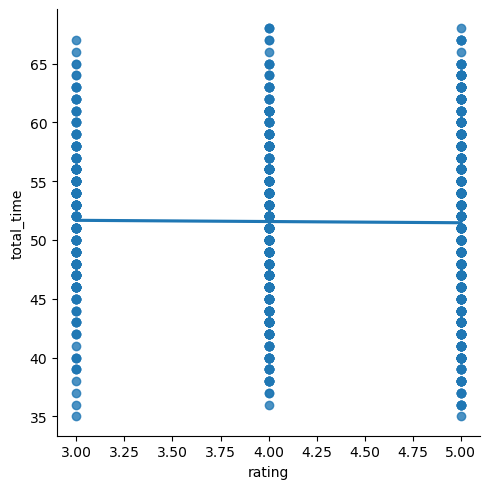

In [25]:
sns.pointplot(data=df,x='rating',y='food_preparation_time')
plt.show()
sns.pointplot(data=df,x='rating',y='delivery_time')
plt.show()
sns.lmplot(data=df,x='rating',y='total_time',ci=False)

For the rating and time relationship, it seems there is a slight negative correlation. In the delivery time pointplot, the higher delivery time saw lower ratings. However, as seen in the linear model plot, the correlation is almost negligible. 

#### Cuisine Type vs Cost

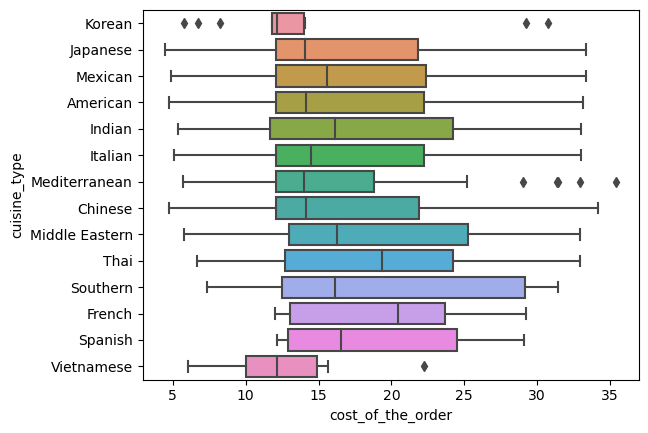

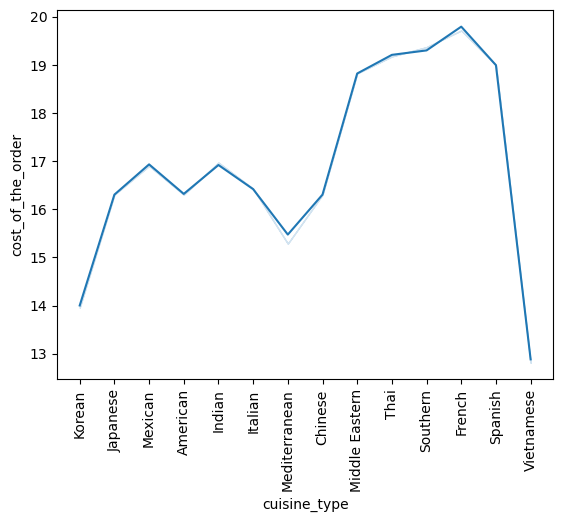

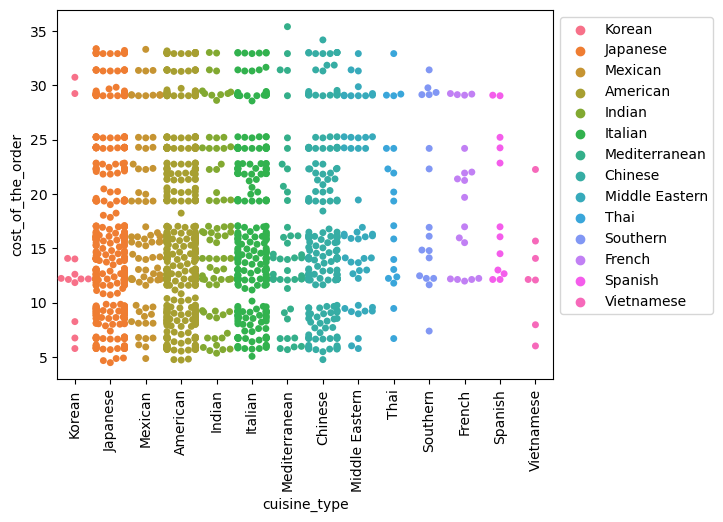

In [26]:
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
plt.show()
sns.lineplot(data=df,y='cost_of_the_order',x='cuisine_type',ci=False);
plt.xticks(rotation=90)
plt.show();
sns.swarmplot(data=df,y='cost_of_the_order',x='cuisine_type',hue='cuisine_type')
plt.legend(bbox_to_anchor=[1, 1])
plt.xticks(rotation=90)
plt.show()

For cuisine type, it seems that, on average, French, Spanish, and Southern food types are the most expensive at around \\$19 to $20. This is seen in the line plot. However, as seen in the swarm plot, there isn't as many data points in those categories as compared to the more popular ones, and this may be skewing the data. The cheapeast cuisines are Korean and Vietnamese on average, but, again, it seems that this may be due to the low number of data points for these categories. Of the more popular categories, such as American, Italian, and Japanese, are hovering around the \\$15 to \\$20 range. The boxplot shows there are outliers for Korean, Mediterranean, and Vietnamese, leading to more changes in averages. 

#### Cuisine Type vs Preparation Time

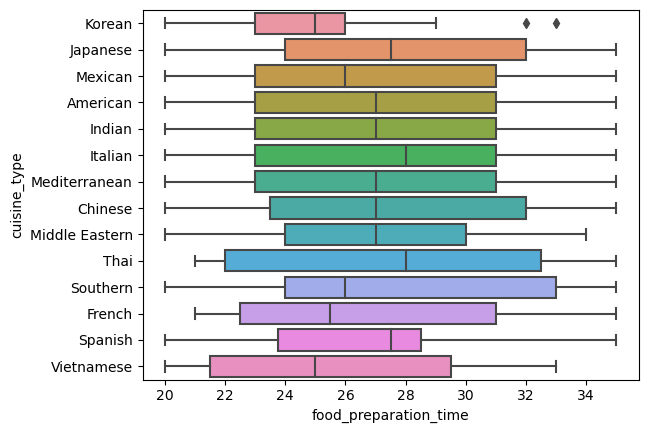

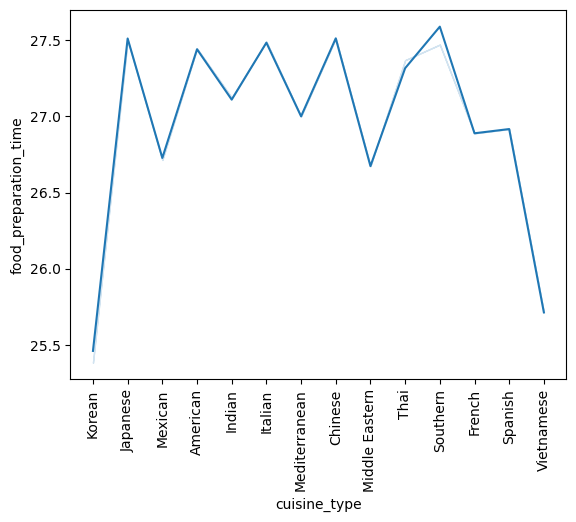

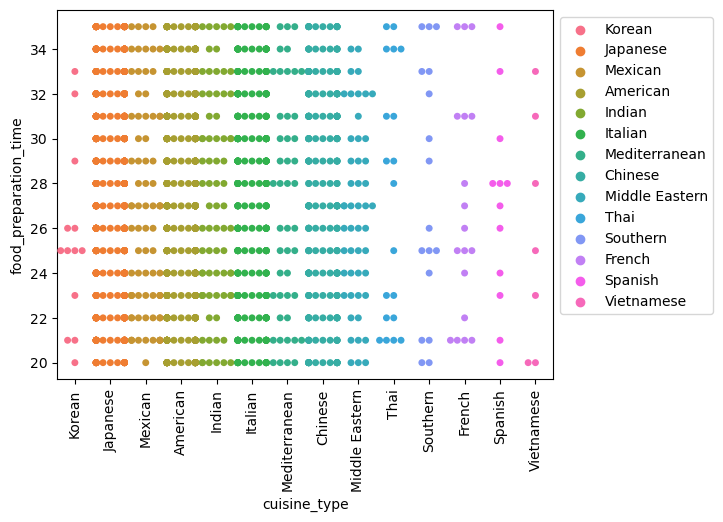

In [27]:
sns.boxplot(data=df, y='cuisine_type',x='food_preparation_time')
plt.show()
sns.lineplot(data=df, x='cuisine_type',y='food_preparation_time',ci=False)
plt.xticks(rotation=90);
plt.show()
sns.swarmplot(data=df,y='food_preparation_time',x='cuisine_type',hue='cuisine_type')
plt.legend(bbox_to_anchor=[1, 1])
plt.xticks(rotation=90)
plt.show()

For cuisine type and preparation time, it seems that French and Japanese had the highest times. The French data may be unreliable as there aren't many datpoints, but the Japanese category has a good amount of data, so their high average prep time may be more accurate. Most other categories are hovering between 26.5 and 27.5 minutes of preparation time. 

#### Day of the Week vs Cost

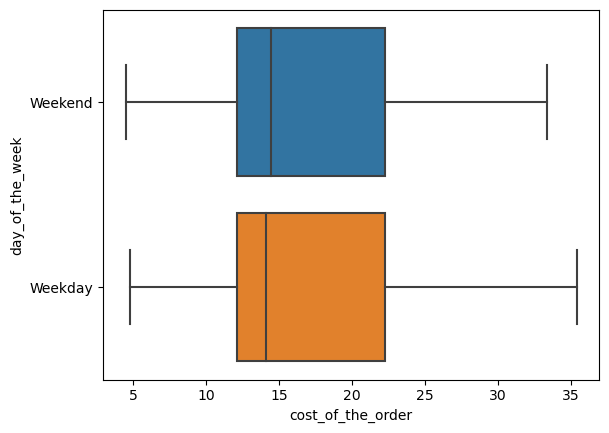

<Axes: xlabel='cost_of_the_order', ylabel='day_of_the_week'>

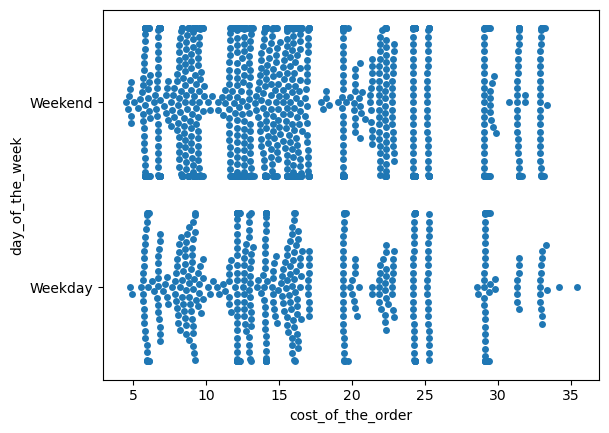

In [28]:
sns.boxplot(data=df,x='cost_of_the_order',y='day_of_the_week')
plt.show()
sns.swarmplot(data=df,x='cost_of_the_order',y='day_of_the_week')

According to these plots, it doesn't seem there is much difference in price depending on the wether it is a weekend or a weekday. 

#### Day of the Week vs Time

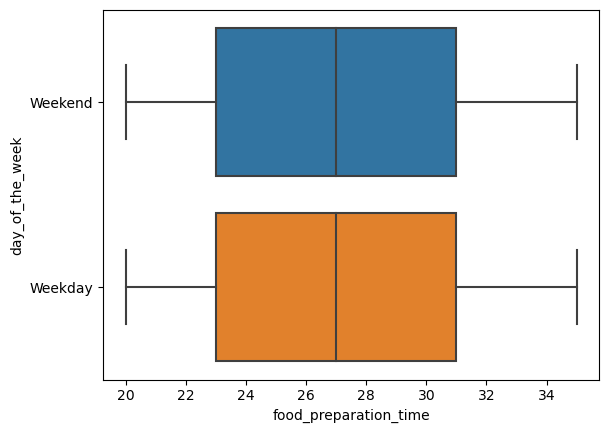

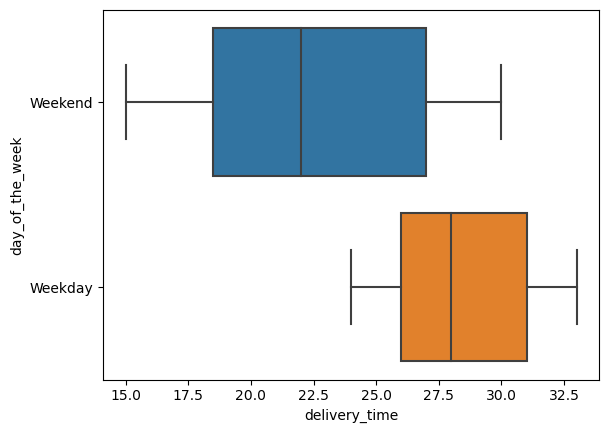

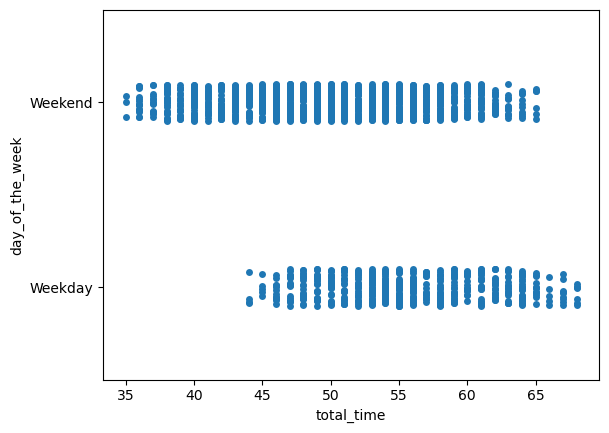

In [29]:
sns.boxplot(data=df, x='food_preparation_time',y='day_of_the_week')
plt.show()
sns.boxplot(data=df, x='delivery_time',y='day_of_the_week')
plt.show()
sns.stripplot(data=df, x='total_time',y='day_of_the_week');

For day of week versus time it seems preparation time is similar for the whole week. However, for delivery time, it seems the time is longer on weekdays, with a median of around 28 minutes, while weekends have a median of around 21. This makes sense as the weekdays are more busy during rush hour, so delivery time will take longer with traffic. 

#### Time vs Cost

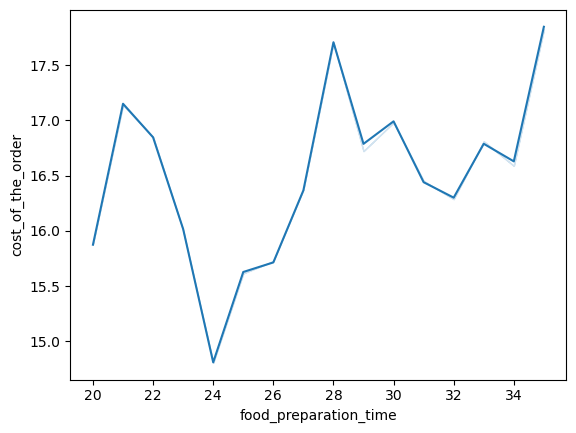

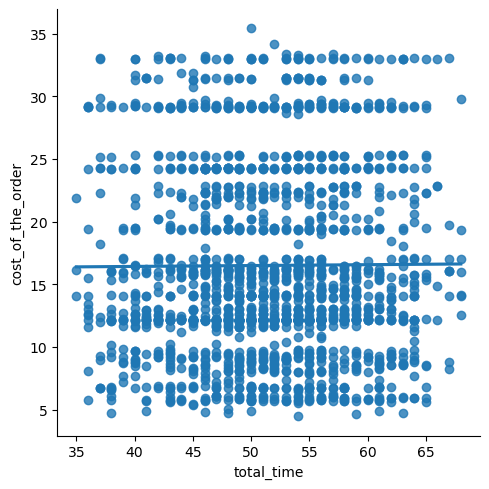

In [30]:
sns.lineplot(data=df,x='food_preparation_time',y='cost_of_the_order',ci=False)
plt.show();
sns.lmplot(data=df,x='total_time',y='cost_of_the_order',ci=False);

The linear model plot for the times and the cost of the order shows a slight positive correlation between the two. The line plot at first glance shows a general upward trend. This may be due to the idea that if food takes a longer time to prepare, it would be more costly to the restaurant and more expensive to the consumer. 

In [31]:
rev=df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head()
rev

restaurant_name
Shake Shack                 3579.530
The Meatball Shop           2145.210
Blue Ribbon Sushi           1903.950
Blue Ribbon Fried Chicken   1662.290
Parm                        1112.760
Name: cost_of_the_order, dtype: float64

Of the restaurants, Shake Shack made the most money based on the order cost with a revenue of $3579.53. This makes sense as they also had the highest count of orders of any restaurant. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. 

In [62]:
promotion = df.groupby('restaurant_name').agg(rating_count=('rating','count'),rating_mean=('rating','mean'))
filter_criteria1 = (promotion['rating_count']>50) & (promotion['rating_mean']>4)
promotion_f=promotion[filter_criteria1]
promotion_f.sort_values(by='rating_count',ascending=False)

,rating_count,rating_mean
restaurant_name,,
Shake Shack,133,4.278
The Meatball Shop,84,4.512
Blue Ribbon Sushi,73,4.219
Blue Ribbon Fried Chicken,64,4.328


#### Observations:
The restaurants that have more than 50 ratings with an average rating of above 4 are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. 

In [59]:
order_cost=df['cost_of_the_order']
net_rev=0
for cost in order_cost:
    if cost > 20:
        net_rev += (0.25*cost)
    elif cost >5:
        net_rev += (0.15*cost)
    else:
        net_rev
print('$',(f'{net_rev:.2f}'))

$ 6166.30


#### Observations:
Across all orders, the company made a revenue of $6166.30 with their charges.  

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [34]:
time_percent = (df[df['total_time']>60].shape[0]/(df.shape[0])*100)
print(round(time_percent,2),'%')

10.54 %


#### Observations:
10.54% of the orders took more than 60 minutes to be delivered from the time they are ordered. 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? 

In [35]:
delivery_weekday=df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
print('Mean delivery time on the weekdays is',round(delivery_weekday,2),'minutes')
delivery_weekend=df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()
print('Mean delivery time on the weekends is',round(delivery_weekend,2),'minutes')
delivery_diff=((delivery_weekday-delivery_weekend)/delivery_weekend)*100
print('On average, the delivery time on weekdays is',round(delivery_diff,2),'% higher than on weekends')

Mean delivery time on the weekdays is 28.34 minutes
Mean delivery time on the weekends is 22.47 minutes
On average, the delivery time on weekdays is 26.12 % higher than on weekends


#### Observations:
The mean delivery time on the weekdays is 28.34 minutes and 22.47 minutes on the weekend. This makes the average delivery time to be 26.12% longer on the weekdays. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) 

### Conclusions:
*  There are many orders that are not given a rating. When using rating as a variable, these orders must be ignored or the rating replaced using some replacement method. 
* The most popular cuisine is American.
* The most popular days of the week to order are on weekends.
* The most popular restaurant is Shake Shack.
* Each customer ordered, on average, 1.53 times.
* There is little correlation between the numerical variables.
* The most popular orders cost between \\$10 to $15
* The company made over \\$6000 in revenue from the charges.
* There is a disparity between the delivery time on weekends and weekdays. 

### Recommendations:

*  The ratings should be addressed. The company could use an incentive to encourage customers to leave a rating. This could be a coupon after leaving a review, or better benefits when using the app. If this does not happen, the company needs to use a proper replacement method for the "Not Given" rating. This would make it easier for the employees to analyze the data.  
* Since the most often day to order is on the weekend, the company can use this to their advantage and promote deals and such for those days that incentivize the most profit for the them and the restaurants. 
* Since the most popular cuisine is American, the company can do something similar and take adavantage of this trend. They can offer benefits to anyone that gets American cuisine from certain restaurants, which will be seen by many people, and more profit can be made. 
<br>
On the other hand, the least popular cuisines include French, Korean, and Vietnamese. The Company can offer deals on these cuisines in order to aid in gathering more data and better understand the relationships between these cuisines and other variables. 
* On average, each customer ordered 1.53 times, so the company can incentivize new users to make their first purchase by giving a coupon or distinct benefits. This could increase the average orders per customer by encouraging new people to join and make more orders. 
* Since the most common orders are between 10 and 15 dollars, the company can use this by offering deals on these foods and dishes. This should increase the popularity even more and help the company and the restaurants make a profit. 
* The company could add another layer to their charges to the restaurants. An example could be a 30% cost to the restaurant for orders above \\$30. This would make the company have more revenue per expensive order. However there aren't very many order above \\$30, so the pros and cons would have to be balanced. 
* For the delivery time difference for different days of the week, the company could offer promotions for dishes and foods that have a lower preparation time to offset the higher delivery time on the weekdays. 
* There is little correlation between the numerical variables, except for time, so it should not be recommended that the company make business decisions based on variable relationships until more data is collected. After more data is given, the correlations may be better fleshed out, and more accurate conclusions can be made. 

---